In [8]:
#Loading NLTK
%matplotlib inline
import nltk
import requests 
from bs4 import BeautifulSoup
import  re
import string

In [9]:
url= 'https://www.mohfw.gov.in/' 
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

stopwords = nltk.corpus.stopwords.words('english')
language_whitelist = ['en']
english_vocab = set(w.lower() for w in nltk.corpus.words.words())

for script in soup(["script", "style"]):
    script.extract()
    text = soup.get_text()
    lines = (line.strip() for line in text.splitlines())
    chunks = (phrase.strip() for line in lines for phrase in line.split("  "))
    text = '\n'.join(chunk.lower() for chunk in chunks if chunk)
    filter_text = " ".join(w for w in nltk.word_tokenize(text) \
         if w.lower() in english_vocab)

    tokens = nltk.word_tokenize(filter_text)

    allWordExceptStopDist = nltk.FreqDist(
        w.lower() for w in tokens if w not in stopwords and len(w) >= 3 and w[0])

    all_words = [i for i in allWordExceptStopDist]


In [10]:
from nltk.probability import FreqDist
fdist = FreqDist(all_words)
print(fdist)

<FreqDist with 427 samples and 427 outcomes>


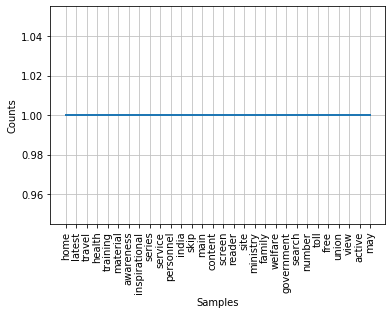

In [11]:
fdist.most_common()

# Frequency Distribution Plot
import matplotlib.pyplot as plt
fdist.plot(30,cumulative=False)
plt.show()

In [12]:
# Import pandas
import pandas as pd


In [14]:
df = pd.read_csv('words.csv')
print(df.head())
print(df.shape)
print(df.count())


      Adult         Arts                Business          Computers  \
0    mature  portraiture            jurisdiction         calculator   
1    person          pop             shareholder            machine   
2       man      artless  public limited company    analog computer   
3     woman       artful              management          computing   
4  maturity     artistic           stock echange  personal computer   

           Games     Health       Home      Kids Recreation        Reference  \
0           play    disease      house      baby        rec  cross reference   
1  computer game    obesity  household     child       camp          mention   
2         tennis        who   dwelling  younster      swing         handbook   
3       baseball   medicine      abode   kidskin    boating            frame   
4          gamey  nutrition  apartment      tyke      union         touching   

      Science       Shopping       Society           Politics  \
0  scientific          plaz

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 16 columns):
Adult         40 non-null object
Arts          40 non-null object
Business      40 non-null object
Computers     40 non-null object
Games         40 non-null object
Health        40 non-null object
Home          40 non-null object
Kids          40 non-null object
Recreation    40 non-null object
Reference     40 non-null object
Science       40 non-null object
Shopping      40 non-null object
Society       40 non-null object
Politics      40 non-null object
language      40 non-null object
Education     40 non-null object
dtypes: object(16)
memory usage: 5.1+ KB


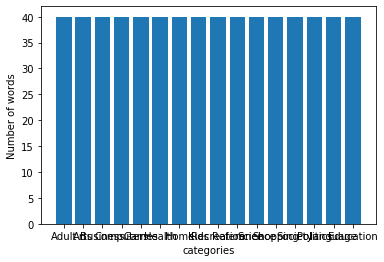

In [77]:
 %matplotlib inline
import matplotlib.pyplot as plt
x= df.columns

plt.bar((df.columns),df[x].count())
plt.xlabel('categories')
plt.ylabel('Number of words')
plt.show()


In [81]:
import csv
labels= []
features = []

word_list = []
with open('words.csv', 'r') as file:
        csv_file = csv.DictReader(file)
        print(csv_file)
        for row in csv_file:
            result = dict(row)
            for key,value in result.items():
                labels.append(key)
                features.append(value)
                if value in all_words:
                    print(value)
                    word_list.append(key)
a=pd.DataFrame(labels)
b=pd.DataFrame(features)
print(a)
print(b)

play
house
management
medicine
community
union
place
welfare
hindi
medicine
design
take
guide
nursing
smooth
stress
self
safety
note
training
hygiene
research
social
state
medical
role
education
strategy
environmental
information
insurance
homemade
elderly
hygiene
human
family
water
insurance
social
worker
             0
0        Adult
1         Arts
2     Business
3    Computers
4        Games
..         ...
635   Shopping
636    Society
637   Politics
638   language
639  Education

[640 rows x 1 columns]
                    0
0              mature
1         portraiture
2        jurisdiction
3          calculator
4                play
..                ...
635    shopping goods
636  underprivilleged
637             polis
638           dialect
639           teacher

[640 rows x 1 columns]


In [84]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
#tokenizer to remove unwanted elements from out data like symbols and numbers
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)

text_counts= cv.fit_transform(df[x])


In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    text_counts, df.columns, test_size=0.3, random_state=1)


In [48]:
from sklearn.naive_bayes import MultinomialNB
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))


MultinomialNB Accuracy: 0.0


In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()
text_tf= tf.fit_transform(df[x])


In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    text_tf, df.columns, test_size=0.3, random_state=123)



In [85]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))



MultinomialNB Accuracy: 0.0


In [86]:
from sklearn.metrics import accuracy_score
from scipy.sparse import coo_matrix
X_sparse = coo_matrix(b)

from sklearn.utils import shuffle
X, X_sparse, y = shuffle(b, X_sparse, a, random_state=0)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

TypeError: no supported conversion for types: (dtype('O'),)

In [87]:
from sklearn import svm
svm = svm.SVC()
svm.fit(X_train, y_train)
predictions = svm.predict(X_test)
score = svm.score(X_test, y_test)
print(predictions)
print(score)

['language' 'language' 'language' 'language' 'language']
0.0


/home/shivananda/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
